A major scale in music can be defined by its pattern of whole and half steps. In Western music, the major scale consists of seven notes, following the pattern: whole, whole, half, whole, whole, whole, half. Here's an algorithmic representation of generating a major scale for a given root note (assuming a 12-tone equal temperament tuning system):

1. Define the pattern of whole and half steps for a major scale: [2, 2, 1, 2, 2, 2, 1].
2. Define the list of note names in chromatic order: ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"].
3. Determine the index of the root note in the chromatic list (e.g., "C" would be 0, "C#" would be 1, "D" would be 2, and so on).
4. Initialize an empty list to store the major scale notes.
5. Iterate through the pattern of whole and half steps, adding the current step value to the index of the root note, and modulo 12 to wrap around the chromatic list if necessary.
6. For each resulting index, append the corresponding note from the chromatic list to the major scale notes list.
7. Return the list of major scale notes.

In [68]:
def generate_major_scale(root_note):
    major_scale_pattern = [2, 2, 1, 2, 2, 2, 1]
    chromatic_notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    root_note_index = chromatic_notes.index(root_note)
    major_scale_notes = []

    for step in major_scale_pattern:
        root_note_index = (root_note_index + step) % 12
        major_scale_notes.append(chromatic_notes[root_note_index])

    return major_scale_notes

In [69]:
print(generate_major_scale("C"))  # Output: ['D', 'E', 'F', 'G', 'A', 'B', 'C']
print(generate_major_scale("D"))  # Output: ['E', 'F#', 'G', 'A', 'B', 'C#', 'D']

['D', 'E', 'F', 'G', 'A', 'B', 'C']
['E', 'F#', 'G', 'A', 'B', 'C#', 'D']


Here's a Python implementation using the NetworkX library to create a graph representing the major scales:

In [70]:
import networkx as nx

def create_major_scale_graph():
    major_scale_pattern = [2, 2, 1, 2, 2, 2, 1]
    chromatic_notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

    # Create an empty directed graph
    major_scale_graph = nx.DiGraph()

    # Add nodes for each chromatic note
    for note in chromatic_notes:
        major_scale_graph.add_node(note)

    # Add edges for each whole and half step in the major scale pattern
    for root_note in chromatic_notes:
        root_note_index = chromatic_notes.index(root_note)
        for step in major_scale_pattern:
            root_note_index = (root_note_index + step) % 12
            scale_note = chromatic_notes[root_note_index]

            # Add an edge from the root note to the scale note
            major_scale_graph.add_edge(root_note, scale_note)

    return major_scale_graph

def generate_major_scale_from_graph(major_scale_graph, root_note):
    # Retrieve the major scale notes by following the edges from the root note
    major_scale_notes = list(major_scale_graph.successors(root_note))
    return major_scale_notes

major_scale_graph = create_major_scale_graph()
print(generate_major_scale_from_graph(major_scale_graph, "C"))  # Output: ['D', 'E', 'F', 'G', 'A', 'B', 'C']
print(generate_major_scale_from_graph(major_scale_graph, "D"))  # Output: ['E', 'F#', 'G', 'A', 'B', 'C#', 'D']

['D', 'E', 'F', 'G', 'A', 'B', 'C']
['E', 'F#', 'G', 'A', 'B', 'C#', 'D']


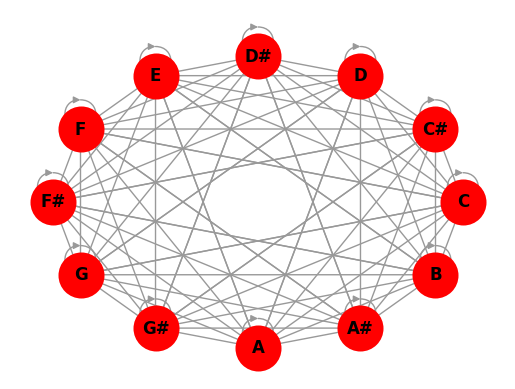

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_major_scale_graph(graph):
    # Set up a circular layout for the nodes
    pos = nx.circular_layout(graph)

    # Set up node and edge colors
    node_color = '#f00'
    edge_color = '#999'

    # Set up node and edge line width
    node_line_width = 1.5
    edge_line_width = 1

    # Set up node size and label font size
    node_size = 1000
    font_size = 12

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_color=node_color, node_size=node_size, linewidths=node_line_width)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, width=edge_line_width, edge_color=edge_color)

    # Draw labels
    nx.draw_networkx_labels(graph, pos, font_size=font_size, font_family='Arial', font_weight='bold')

    # Remove the axis
    plt.axis('off')

    # Display the graph
    plt.show()

draw_major_scale_graph(major_scale_graph)

To add minor scales to the Python algorithm, we can use a similar approach to the one used for major scales but with a different interval pattern. Here's the code for generating minor scales:

In [72]:
def generate_minor_scale(note):
    minor_scale_pattern = [2, 1, 2, 2, 1, 2, 2]
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    minor_scale = []

    # Find the starting note index
    start_idx = notes.index(note)

    # Generate the minor scale using the minor scale pattern
    for interval in minor_scale_pattern:
        minor_scale.append(notes[start_idx % len(notes)])
        start_idx += interval

    return minor_scale

# Example usage
print(generate_minor_scale("A"))


['A', 'B', 'C', 'D', 'E', 'F', 'G']


We can also add minor scales to the major scale NetworkX graph. The minor scale can be represented as a graph similar to the major scale graph. The natural minor scale has the following pattern: whole, half, whole, whole, half, whole, whole. Let's create the minor scale graph and combine it with the major scale graph.

In [1]:
import networkx as nx

def create_scale_graph(scale_type):
    major_scale_pattern = [2, 2, 1, 2, 2, 2, 1]
    minor_scale_pattern = [2, 1, 2, 2, 1, 2, 2]
    chromatic_notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

    scale_graph = nx.DiGraph()

    for note in chromatic_notes:
        scale_graph.add_node(note)

    scale_pattern = major_scale_pattern if scale_type == 'major' else minor_scale_pattern

    for root_note in chromatic_notes:
        root_note_index = chromatic_notes.index(root_note)
        for step in scale_pattern:
            root_note_index = (root_note_index + step) % 12
            scale_note = chromatic_notes[root_note_index]
            scale_graph.add_edge(root_note, scale_note)

    return scale_graph

def generate_scale_from_graph(scale_graph, root_note):
    scale_notes = list(scale_graph.successors(root_note))
    return scale_notes

major_scale_graph = create_scale_graph('major')
minor_scale_graph = create_scale_graph('minor')
print(generate_scale_from_graph(major_scale_graph, "C"))  # Output: ['D', 'E', 'F', 'G', 'A', 'B', 'C']
print(generate_scale_from_graph(major_scale_graph, "D"))  # Output: ['E', 'F#', 'G', 'A', 'B', 'C#', 'D']
print(generate_scale_from_graph(minor_scale_graph, "C"))  # Output: ['D', 'D#', 'F', 'G', 'G#', 'A#', 'C']
print(generate_scale_from_graph(minor_scale_graph, "D"))  # Output: ['E', 'F', 'G', 'A', 'A#', 'C', 'D']


['D', 'E', 'F', 'G', 'A', 'B', 'C']
['E', 'F#', 'G', 'A', 'B', 'C#', 'D']
['D', 'D#', 'F', 'G', 'G#', 'A#', 'C']
['E', 'F', 'G', 'A', 'A#', 'C', 'D']


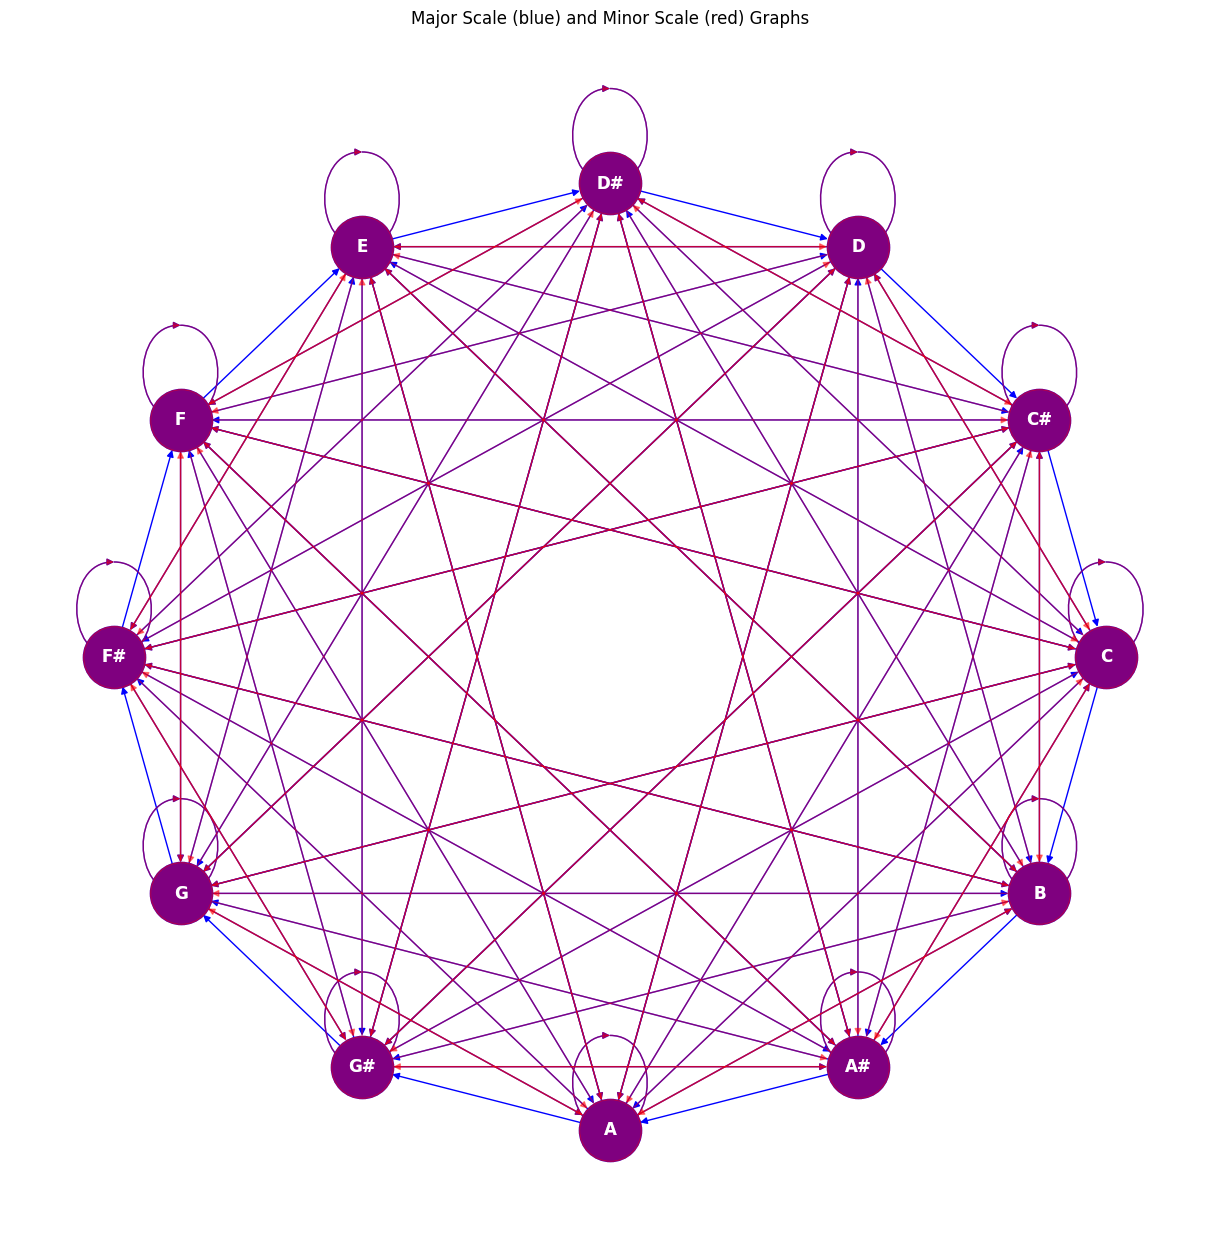

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# ... create_scale_graph and generate_scale_from_graph functions go here ...

def visualize_scale_graphs(major_scale_graph, minor_scale_graph):
    plt.figure(figsize=(12, 12))
    pos = nx.circular_layout(major_scale_graph)

    # Draw major scale graph nodes and edges with blue color
    nx.draw(major_scale_graph, pos, node_color='blue', edge_color='blue', with_labels=True, font_color='white', font_weight='bold', node_size=2000)

    # Draw minor scale graph nodes and edges with red color
    nx.draw(minor_scale_graph, pos, node_color='red', edge_color='red', with_labels=True, font_color='white', font_weight='bold', node_size=2000, alpha=0.5)

    # Add title and show the plot
    plt.title("Major Scale (blue) and Minor Scale (red) Graphs")
    plt.show()

major_scale_graph = create_scale_graph('major')
minor_scale_graph = create_scale_graph('minor')
visualize_scale_graphs(major_scale_graph, minor_scale_graph)
